# Задача 6.1

Рассмотрим задачу: предсказание числа заболевших некоторой болезнью от некоторых экологических анализов (см. [файл](data/sick.csv)). Гарантируется, что предсказание описывается линейной моделью.

Так как проведение анализов не является бесплатным, то стоит вопрос о том, какие из анализов являются лишними для предсказания линейной модели на уровне значимости $\alpha = 0.05$.

**Требуется:**
1. Записать задачу формально.
2. Провести отбор признаков линейной модели.

Все выкладки должны быть сделаны аналитически, без использования компьютера. Допускается использование компютера для подстановки численых значений в финальную формулу.

**Формальная задача: методом линейной регрессии провести отбор признаков.**

In [1]:
import pandas as pd

data = pd.read_csv("data/sick.csv")
data.sample(5)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,Y
12,-1.3,0.4,-0.2,-1.4,0.8,0.4,-0.6,-0.8,0.3,-0.2,1.0
15,1.8,-1.4,-0.6,0.5,1.4,0.9,0.7,-0.6,0.3,0.2,0.0
2,0.3,-0.9,0.8,-0.3,-0.2,-1.4,0.4,1.6,1.0,-0.3,3.0
18,-1.3,0.3,0.7,1.4,-1.1,2.0,1.1,-0.9,-0.2,-1.1,3.0
14,-1.3,-0.8,0.5,-0.7,-0.6,-0.5,0.8,-0.9,-0.9,-1.0,3.0


In [2]:
import statsmodels.api as sm

model = sm.GLM.from_formula('Y~x1 + x2 + x3 + x4 + x5 + x6 + x7 + x8 + x9 + x10', 
                             data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      Y   No. Observations:                   30
Model:                            GLM   Df Residuals:                       19
Model Family:                Gaussian   Df Model:                           10
Link Function:               identity   Scale:                          4.2355
Method:                          IRLS   Log-Likelihood:                -57.369
Date:                Sun, 04 Apr 2021   Deviance:                       80.474
Time:                        22:16:46   Pearson chi2:                     80.5
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9411      0.491      3.954      0.000       0.979       2.903
x1            -0.8668      0.380     -2.284      0.022      -1.611      -0.123
x2             0.3373      0.456      0.739      0.460      -0.557       1.232
x3             2.9763      0.527      5.651      0.000       1.944       4.009
x4             0.4234      0.355      1.193      0.233      -0.272       1.119
x5             0.0855      0.516      0.166      0.869      -0.927       1.098
x6            -0.4043      0.430     -0.940      0.347      -1.247       0.438
x7            -0.3956      0.438     -0.903      0.367      -1.255       0.464
x8             0.1615      0.472      0.342      0.732      -0.763       1.086
x9             0.0899      0.461      0.195      0.845      -0.814       0.994
x10           -0.0148      0.550     -0.027      0.979      -1.092       1.063
==============================================================================
"""

Случайные величины из выборки абсолютно непрерывны, значит нам потребуется непрерывная функция распределение. По умолчанию будет использоваться нормальное распределение (Гаусса). Проверим это:

In [3]:
model.family

Оценим полученные результаты: как видно из $summary$ модели, признаки $x_2, x_4, x_5, x_6, x_7, x_8, x_9, x_{10}$ являются незначимыми $\rightarrow$ удалим их.

In [4]:
model = sm.GLM.from_formula('Y ~ x1 + x3',
                             data=data).fit()
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
              Results: Generalized linear model
=============================================================
Model:              GLM              AIC:            125.9859
Link Function:      identity         BIC:            4.0241  
Dependent Variable: Y                Log-Likelihood: -59.993 
Date:               2021-04-04 22:16 LL-Null:        -89.993 
No. Observations:   30               Deviance:       95.856  
Df Model:           2                Pearson chi2:   95.9    
Df Residuals:       27               Scale:          3.5502  
Method:             IRLS                                     
-------------------------------------------------------------
               Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-------------------------------------------------------------
Intercept      1.7281   0.3668  4.7114 0.0000  1.0092  2.4469
x1            -0.7420   0.2971 -2.4975 0.0125 -1.3244 -0.1597
x3             3.1980   0.4326  7.3923 0.0000  2.3501  4.0459
=============================================================

"""

Попробуем возвращать по одному удалённые признаки:

In [7]:
formula = 'Y ~ x1 + x3 +'
for p in ['x2','x4','x5','x6','x7','x8', 'x9', 'x10']:
    model = sm.GLM.from_formula(formula+p, data=data).fit()
    print (p, model.bic)

x2 5.903007009016434
x4 1.8176884483582398
x5 7.172202578424802
x6 4.28781292794568
x7 6.22413849265628
x8 6.6120411017059695
x9 7.344596791860781
x10 7.415686304733683


/home/hp/.local/lib/python3.8/site-packages/statsmodels/genmod/generalized_linear_model.py:1721: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(


Из двух моделей предпочтительно выбрать с меньшим значением байесовского критерия. Лучший показатель выдает добавление признака $x_4$.

In [8]:
model = sm.GLM.from_formula('Y ~ x1 + x3 + x4', data=data, family=sm.families.Gaussian()).fit()
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
              Results: Generalized linear model
=============================================================
Model:              GLM              AIC:            126.1775
Link Function:      identity         BIC:            1.8177  
Dependent Variable: Y                Log-Likelihood: -59.089 
Date:               2021-04-04 22:17 LL-Null:        -90.645 
No. Observations:   30               Deviance:       90.249  
Df Model:           3                Pearson chi2:   90.2    
Df Residuals:       26               Scale:          3.4711  
Method:             IRLS                                     
-------------------------------------------------------------
               Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-------------------------------------------------------------
Intercept      1.6877   0.3641  4.6356 0.0000  0.9741  2.4012
x1            -0.7759   0.2950 -2.6303 0.0085 -1.3541 -0.1977
x3             3.1463   0.4297  7.3223 0.0000  2.3041  3.9885
x4             0.3638   0.2862  1.2710 0.2037 -0.1972  0.9247
=============================================================

"""

Как видно из $summary$, даже добавление этого признака избыточно с $\alpha = 0.05$.

Значит, возвращаемся к модели без 4-го признака и попробуем добавлять значимые межфакторные взаимодействия:у нас такое может быть только между $x_1$ и $x_3$.

In [9]:
formula = 'Y ~ x1 + x3 +'
features = ['x1', 'x3']
for f1 in range(len(features)):
    for f2 in range(f1+1, len(features)): 
        f1_ = features[f1]
        f2_ = features[f2]
        model = sm.GLM.from_formula(formula+str(f1_)+':'+str(f2_),
                                    data=data).fit()               
        for name, p in model.pvalues.items():
            if p < 0.05 and ':' in name:
                print (f1_, f2_, model.bic)

x1 x3 -16.389826449847675


/home/hp/.local/lib/python3.8/site-packages/statsmodels/genmod/generalized_linear_model.py:1721: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(


Следовательно, добавление межфакторного взаимодействия $x_1$ и $x_3$ существенно.

## Финальная модель

In [10]:
model = sm.GLM.from_formula('Y ~ x1 * x3', data=data, family=sm.families.Gaussian()).fit()
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
              Results: Generalized linear model
=============================================================
Model:              GLM              AIC:            119.4176
Link Function:      identity         BIC:            -16.3898
Dependent Variable: Y                Log-Likelihood: -55.709 
Date:               2021-04-04 22:17 LL-Null:        -98.489 
No. Observations:   30               Deviance:       72.041  
Df Model:           3                Pearson chi2:   72.0    
Df Residuals:       26               Scale:          2.7708  
Method:             IRLS                                     
-------------------------------------------------------------
               Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-------------------------------------------------------------
Intercept      1.6900   0.3243  5.2113 0.0000  1.0544  2.3256
x1            -0.4300   0.2832 -1.5183 0.1289 -0.9852  0.1251
x3             3.4223   0.3898  8.7804 0.0000  2.6584  4.1862
x1:x3         -0.8248   0.2813 -2.9317 0.0034 -1.3762 -0.2734
=============================================================

"""

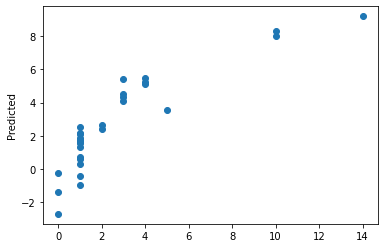

In [15]:
import matplotlib.pylab as plt
import scipy.stats as st

plt.scatter(data['Y'], model.predict(data))
plt.ylabel('Predicted')
st.kendalltau(data['Y'], model.predict(data))

plt.show()